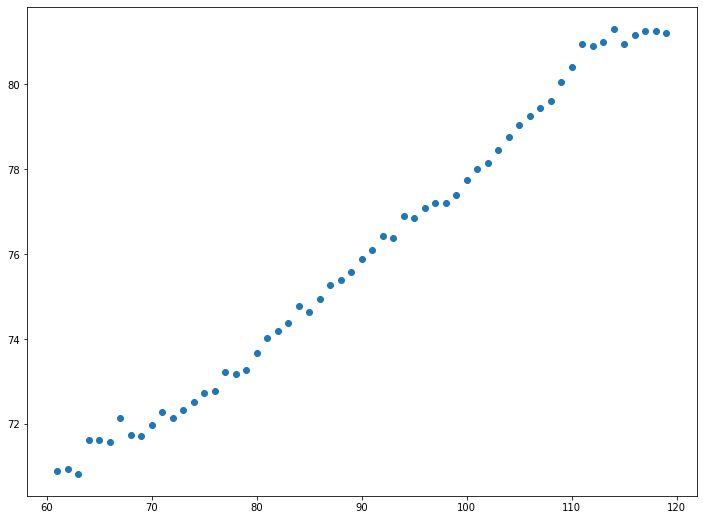

In [3]:
#Least Squares
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('life_expectancy_UK.csv')
X = data.iloc[:,0]
Y = data.iloc[:,1]
plt.scatter(X, Y)
plt.show()

In [4]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

0.19731058718410294 58.216768111566324


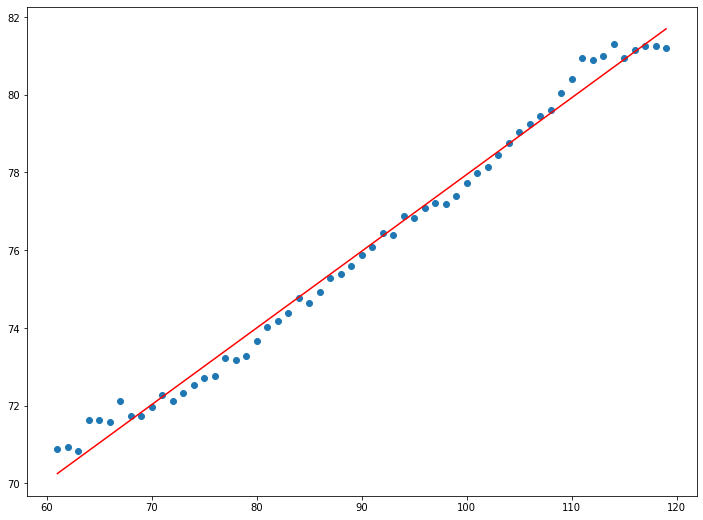

In [5]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
# plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

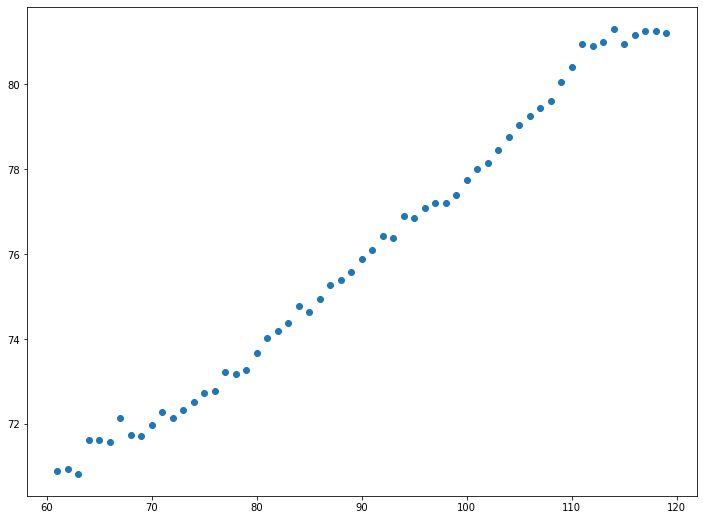

In [13]:
#Polynomial regression with least squares
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing Input data
data = pd.read_csv('life_expectancy_UK.csv')
X = data.iloc[:,0]
Y = data.iloc[:,1]
plt.scatter(X, Y)
plt.show()

#np.random.seed(0)
#x = 2 - 3 * np.random.normal(0, 1, 20)
#y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
#plt.scatter(x,y, s=10)
#plt.show()

0.3338360148928335
0.9902253405616449


<ipython-input-15-182240f1ebfa>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x1 = X[:, np.newaxis]
<ipython-input-15-182240f1ebfa>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = Y[:, np.newaxis]


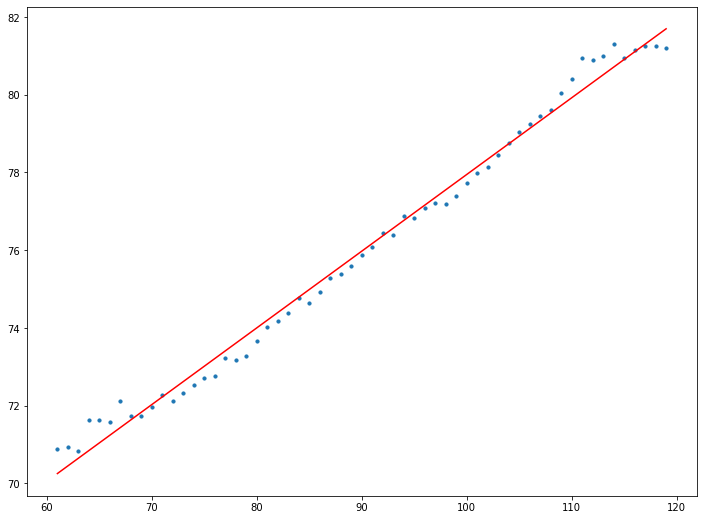

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# transforming the data to include another axis
x1 = X[:, np.newaxis]
y1 = Y[:, np.newaxis]

model = LinearRegression()
model.fit(x1, y1)
y_pred = model.predict(x1)

rmse = np.sqrt(mean_squared_error(y1,y_pred))
r2 = r2_score(y1,y_pred)
print(rmse)
print(r2)

plt.scatter(x1, y1, s=10)
plt.plot(x1, y_pred, color='r')
plt.show()

0.280147080761442
0.9931165293857217


<ipython-input-16-26978f9f9aae>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x2 = X[:, np.newaxis]
<ipython-input-16-26978f9f9aae>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y2 = Y[:, np.newaxis]


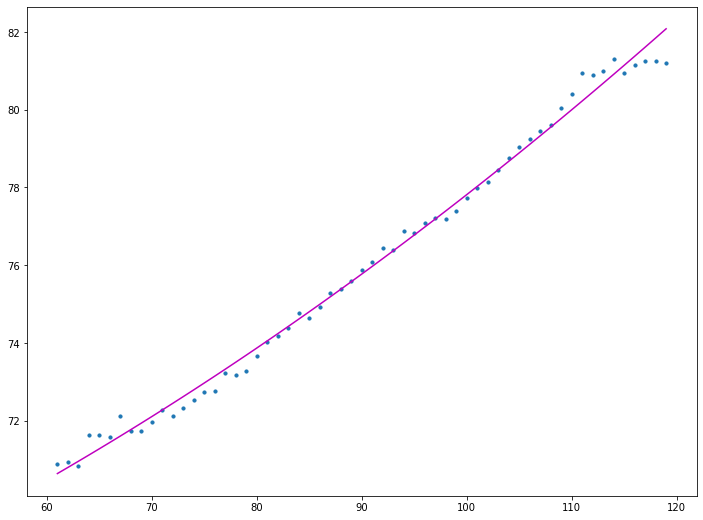

In [16]:
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# transforming the data to include another axis
x2 = X[:, np.newaxis]
y2 = Y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2) # A fit of polynomial degree 2
x_poly = polynomial_features.fit_transform(x2)

model = LinearRegression()
model.fit(x_poly, y2)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y2,y_poly_pred))
r2 = r2_score(y2,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x2, y2, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y_poly_pred), key=sort_axis)
x2, y_poly_pred = zip(*sorted_zip)
plt.plot(x2, y_poly_pred, color='m')
plt.show()

0.2267627065763867
0.9954899794158152


<ipython-input-17-b41d9eb99f22>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x3 = X[:, np.newaxis]
<ipython-input-17-b41d9eb99f22>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y3 = Y[:, np.newaxis]


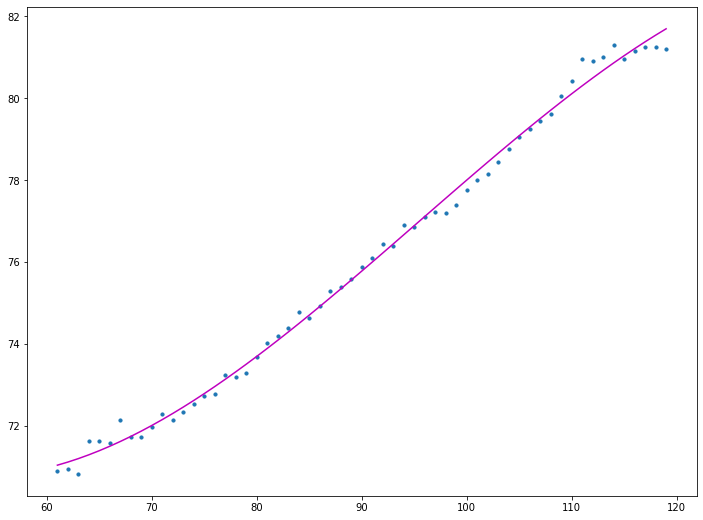

In [17]:
# transforming the data to include another axis
x3 = X[:, np.newaxis]
y3 = Y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3) # A fit of polynomial degree 3
x_poly = polynomial_features.fit_transform(x3)

model = LinearRegression()
model.fit(x_poly, y3)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y3,y_poly_pred))
r2 = r2_score(y3,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x3, y3, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x3,y_poly_pred), key=sort_axis)
x3, y_poly_pred = zip(*sorted_zip)
plt.plot(x3, y_poly_pred, color='m')
plt.show()

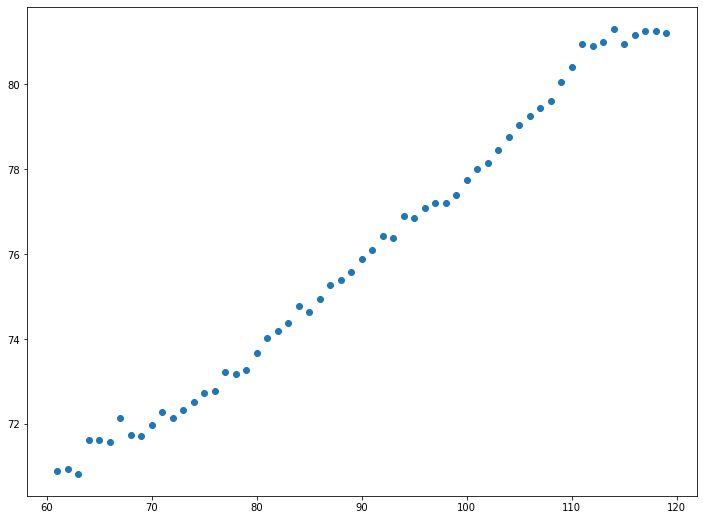

In [1]:
#Gradient Descent
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('life_expectancy_UK.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [2]:
# Building the model
A = 0
B = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = B*X + A  # The current predicted value of Y
    D_B = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt B
    D_A = (-2/n) * sum(Y - Y_pred)  # Derivative wrt A
    B = B - L * D_B  # Update B
    A = A - L * D_A  # Update A
print (A, B)

0.40977343448938314 0.8174120117670223


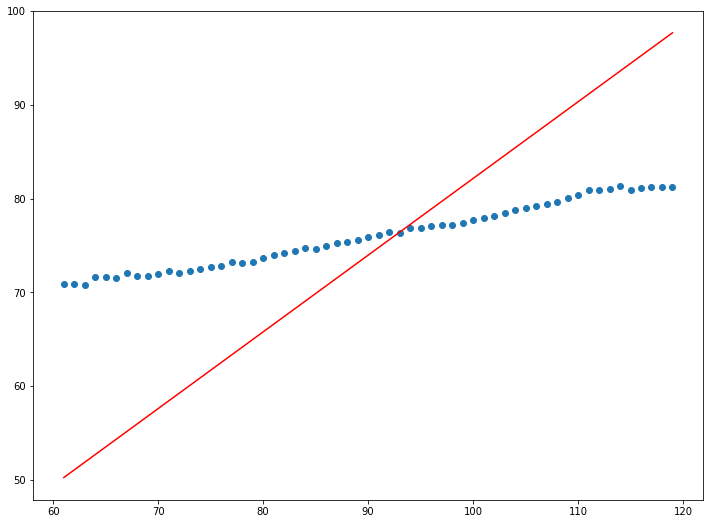

In [3]:
# Making predictions
Y_pred = B*X + A

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()